In [1]:
import numpy as np
import pylab
#import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('hcc-data-complete-balanced.csv') #cargamos tabla
data

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.70,1,3.5,0.50,52.5,37.0,856.0,1
1,0,0,0,0,0,0,1,1,0,1,...,120,7.0,0.58,1,1.8,0.85,32.0,10.0,18.0,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7.0,2.10,5,13.0,0.10,28.0,6.0,16.0,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.20,131.0,78.0,1316.0,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.80,1,9.0,0.10,59.0,15.0,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0,0,0,0,0,0,1,1,0,0,...,117,7.0,5.25,2,8.8,1.35,73.3,46.0,873.0,0
200,0,1,1,0,0,0,0,1,0,0,...,231,6.5,0.78,2,7.6,1.04,69.3,23.0,70.0,0
201,1,1,1,0,0,0,0,1,0,0,...,304,7.0,1.07,1,12.0,1.57,71.2,29.0,106.0,0
202,1,1,1,0,0,0,0,1,0,0,...,197,7.2,1.08,5,3.0,0.63,94.4,83.0,859.0,0


In [5]:
data['Class'].value_counts().sort_index()

0    102
1    102
Name: Class, dtype: int64

In [6]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


Obtenemos los subconjuntos de datos

In [11]:
x = data.drop(['Class'], axis=1) 
y=data['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y, test_size=0.2, random_state=42)

In [53]:
#xtrain=pd.DataFrame(x_train)
#xtrain['Outcome']=y_train
#xtrain.to_csv('data_train.csv')
#data_train= pd.read_csv('data_train.csv')


#xtest=pd.DataFrame(x_test)
#xtest['Outcome']=y_test
#xtest.to_csv('data_test.csv')
#data_test = pd.read_csv('data_test.csv')


## 4.REGRESIÓN LOGÍSTICA

Realizamos proceso normalizando los datos

In [15]:
from sklearn import preprocessing

scaler=preprocessing.StandardScaler().fit(x_train)
x_train_transformed=scaler.transform(x_train)
x_test_transformed=scaler.transform(x_test)

clf = LogisticRegression(solver='lbfgs',multi_class='ovr').fit(x_train_transformed, y_train)




In [16]:
y_pred=clf.predict(x_test_transformed)
prestations=classification_report(y_test,y_pred)
print(prestations)
print('\n \n Matriz de confusion: ')
matrix= pd.crosstab(y_test,y_pred,rownames=['Real'], colnames=['Predicted'], margins= True)
matrix

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.83      0.75      0.79        20

    accuracy                           0.80        41
   macro avg       0.81      0.80      0.80        41
weighted avg       0.81      0.80      0.80        41


 
 Matriz de confusion: 


Predicted,0,1,All
Real,,,
0,18,3,21
1,5,15,20
All,23,18,41


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('accuracy:',accuracy_score(y_test,y_pred))
print('precisión:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))

accuracy: 0.8048780487804879
precisión: 0.8333333333333334
recall: 0.75


## KNN

In [22]:
#Trabajamos con datos normalizados

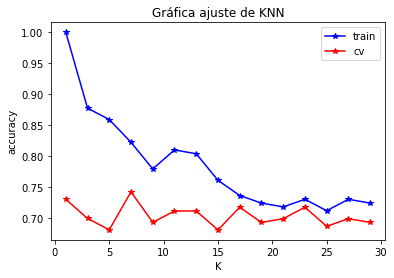

7

In [23]:
from sklearn.metrics import classification_report
from sklearn import preprocessing

scaler=preprocessing.StandardScaler().fit(x_train)
x_train_transformed=scaler.transform(x_train)
x_test_transformed=scaler.transform(x_test)

k_values=range(1,31,2)
cv_k_scores=[]

for k in k_values:

    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, x_train_transformed, y_train, cv=3, scoring='accuracy') #aplicamos cross validation
    cv_k_scores.append(scores.mean())
       

train_prec=[]
k_values2 =list(range(1,31,2))

for k in k_values :
    
    clf = KNeighborsClassifier(n_neighbors=k).fit(x_train_transformed,y_train)
    train_prec.append(clf.score(x_train_transformed,y_train))


plt.plot(k_values2,train_prec,color='b' , marker='*' , label="train")
plt.plot(k_values,cv_k_scores,color='r' , marker='*' , label="cv")
plt.ylabel('accuracy')
plt.xlabel('K')
plt.title('Gráfica ajuste de KNN')
plt.legend(loc='best')
plt.show()
    
        
    
    
    
    
#select the maximum because we are considering accuracy
k_opt2=(np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])
k_opt2
#obtengo valor maximo que tengo que usar para mi clasificador(k)   

In [24]:
#entrenamos nuestro modelo
clf = KNeighborsClassifier(n_neighbors=k_opt2).fit(x_train_transformed,y_train)



In [25]:
y_pred=clf.predict(x_test_transformed)
prestations=classification_report(y_test,y_pred)
print(prestations)
print('\n \n Matriz de confusion: ')
matrix= pd.crosstab(y_test,y_pred,rownames=['Real'], colnames=['Predicted'], margins= True)
matrix

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        21
           1       0.80      0.80      0.80        20

    accuracy                           0.80        41
   macro avg       0.80      0.80      0.80        41
weighted avg       0.80      0.80      0.80        41


 
 Matriz de confusion: 


Predicted,0,1,All
Real,,,
0,17,4,21
1,4,16,20
All,21,20,41


In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('accuracy:',accuracy_score(y_test,y_pred))
print('precisión:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))

accuracy: 0.8048780487804879
precisión: 0.8
recall: 0.8


 ### ÁRBOLES DE DECISIÓN

In [ ]:
#En este caso podemos trabajar con los datos sin normalizar, ya que vamos a obtener las mismas prestaciones.

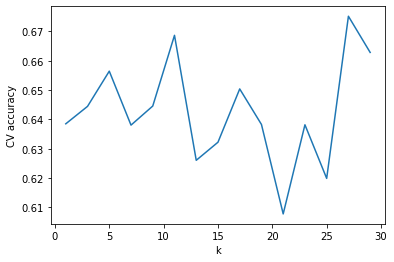

27

In [27]:
from sklearn import tree

k_values=range(1,31,2)
cv_k_scores=[]

for k in k_values:

    clf = tree.DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(clf, x_train, y_train, cv=3, scoring='accuracy') #aplicamos cross validation
    cv_k_scores.append(scores.mean())
    
    
plt.plot(k_values,cv_k_scores)
plt.xlabel('k')
plt.ylabel('CV accuracy')   
plt.show()
    
    
#select the maximum because we are considering accuracy
k_opt3=(np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])
k_opt3

#obtengo valor maximo que tengo que usar para mi clasificador(k)   


In [28]:
clf = tree.DecisionTreeClassifier(max_depth=k_opt3).fit(x_train , y_train ) #entreno arbol


In [29]:
y_pred=clf.predict(x_test)
prestations=classification_report(y_test,y_pred)
print(prestations)
print('\n \n Matriz de confusion: ')
matrix= pd.crosstab(y_test,y_pred,rownames=['Real'], colnames=['Predicted'], margins= True)
matrix

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.83      0.75      0.79        20

    accuracy                           0.80        41
   macro avg       0.81      0.80      0.80        41
weighted avg       0.81      0.80      0.80        41


 
 Matriz de confusion: 


Predicted,0,1,All
Real,,,
0,18,3,21
1,5,15,20
All,23,18,41


In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('accuracy:',accuracy_score(y_test,y_pred))
print('precisión:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))

accuracy: 0.8048780487804879
precisión: 0.8333333333333334
recall: 0.75


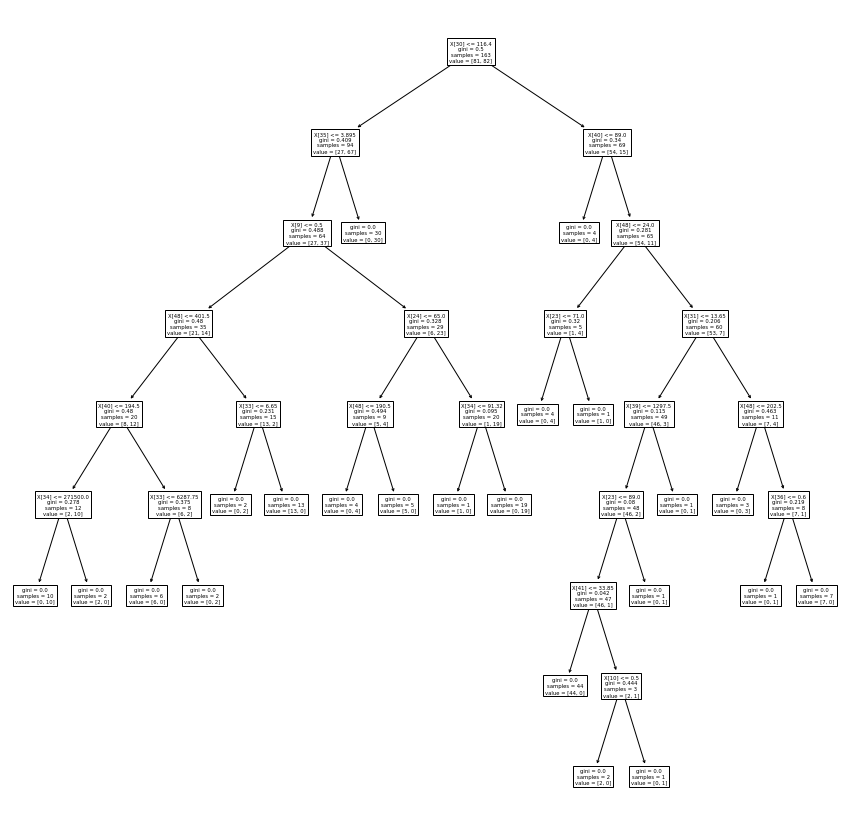

In [31]:
#pintamos árbol con datos de train
plt.figure(figsize=(15,15))
from sklearn import tree

tree=tree.plot_tree(clf.fit(x_train , y_train )) 


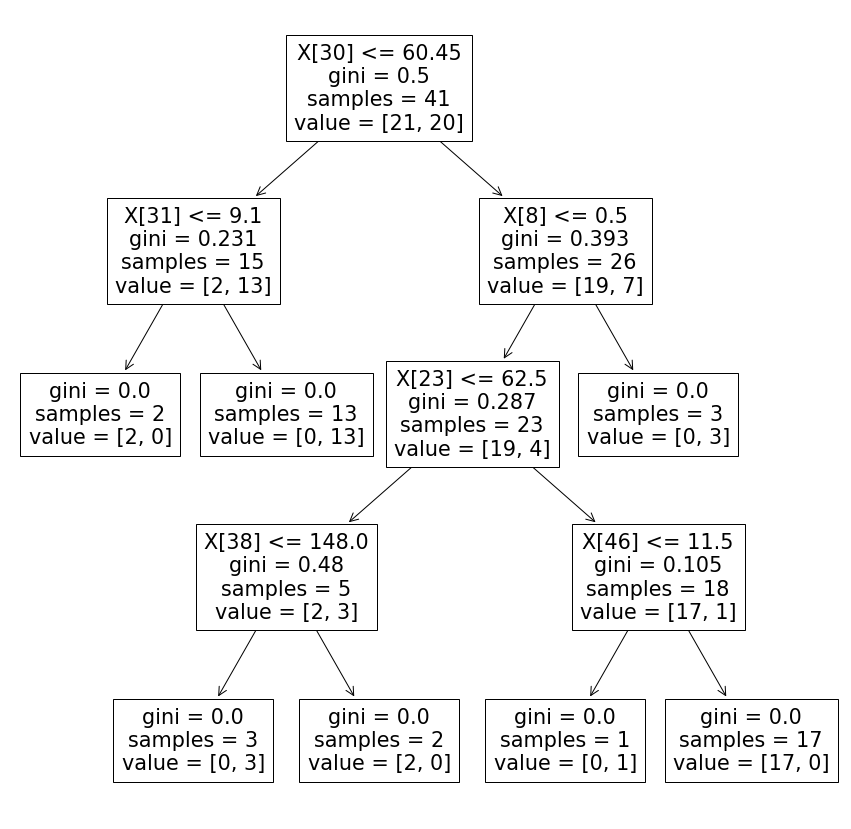

In [32]:
#pintamos árbol con datos de test
plt.figure(figsize=(15,15))
from sklearn import tree

tree=tree.plot_tree(clf.fit(x_test , y_test )) 





## NAIVE BAYES

In [39]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(x_train, y_train)

In [40]:
#predicción de test
y_pred=clf.predict(x_test)
prestations=classification_report(y_test,y_pred)
print(prestations)
print('\n \n Matriz de confusion: ')
matrix= pd.crosstab(y_test,y_pred,rownames=['Real'], colnames=['Predicted'], margins= True)
matrix

              precision    recall  f1-score   support

           0       0.83      0.48      0.61        21
           1       0.62      0.90      0.73        20

    accuracy                           0.68        41
   macro avg       0.73      0.69      0.67        41
weighted avg       0.73      0.68      0.67        41


 
 Matriz de confusion: 


Predicted,0,1,All
Real,,,
0,10,11,21
1,2,18,20
All,12,29,41


In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('accuracy:',accuracy_score(y_test,y_pred))
print('precisión:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))

accuracy: 0.6829268292682927
precisión: 0.6206896551724138
recall: 0.9
